In [10]:
import os

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

In [11]:
import torch
from diffusers import StableDiffusionXLPipeline

# 모델 ID (Hugging Face 경로, 또는 로컬에 다운로드한 모델 경로 사용)
model_id = "cagliostrolab/animagine-xl-3.0"

# # retro
# model_id = "coder119/Vectorartz_Diffusion"
# model_id = "stablediffusionapi/samdoesarts-ultmerge"
# raw_prompt = """
# Prompt: ((masterpiece)), ((best quality)), retro-style illustration, vintage poster, old-school print, ((golden flying croaker fish)), vibrant color, grainy texture, 1980s aesthetic, faded colors, hand-drawn lines, soft shading, limited color palette, surreal atmosphere
# Negative prompt: (worst quality, low quality:1.2), blurry, distorted, photorealistic, 3D render, neon, modern elements, overly detailed  
# """

# # realism
# model_id = "SG161222/Realistic_Vision_V6.0_B1_noVAE"
# model_id = "digiplay/Photon_v1"
# raw_prompt = """
# Prompt: ((masterpiece)), ((best quality)), photorealistic, 8k ultra-detailed, hyper-realistic golden croaker fish, flying in the sky, shimmering golden scales, realistic lighting, soft reflections, cinematic shot, sky background, soft clouds, DSLR photography, natural light  
# Negative prompt: (worst quality, low quality:1.2), blurry, noisy, cartoon, painting, illustration, extra limbs, distorted shape
# """

# # comics
# model_id = "SanDiegoDude/InkPunk768"
# model_id = "daftstout/DDicon"
# raw_prompt = """
# Prompt: ((masterpiece)), ((best quality)), comic book style, bold outlines, halftone shading, exaggerated perspective, ((golden flying croaker fish)), stylized ink drawing, vintage Marvel comics look, vibrant colors, strong contrast, dynamic pose, action shot  
# Negative prompt: (worst quality, low quality:1.2), blurry, photorealistic, watercolor, soft shadows
# """

# # cyberpunk
# model_id = "ProGamerGov/Neon-Illustration-Diffusion"
# model_id = "stablediffusionapi/cetus-mix-whalefall2"
# row_prompt = """
# Prompt: ((masterpiece)), ((best quality)), cyberpunk art, futuristic neon city, glowing golden fish, ((golden flying croaker fish)), neon reflections, holographic effects, sci-fi environment, night sky, electric blue and purple tones, dynamic lighting, cinematic shot  
# Negative prompt: (worst quality, low quality:1.2), blurry, soft colors, monochrome, traditional painting
# """

# # watercolor
# model_id = "gokaygokay/Flux-Watercolor-Strokes-LoRA"
# model_id = "KappaNeuro/makoto-shinkai-style"
# raw_prompt = """
# Prompt: ((masterpiece)), ((best quality)), watercolor painting, soft and delicate brushstrokes, dreamy atmosphere, ((golden flying croaker fish)), glowing golden scales, flowing in the sky, pastel color palette, light blue and white background, gentle lighting, airy composition  
# Negative prompt: (worst quality, low quality:1.2), blurry, overly saturated, sharp outlines, 3D render, photorealistic
# """

# 모델 로드 (FP16 & GPU 사용)
pipe = StableDiffusionXLPipeline.from_pretrained(
    model_id, torch_dtype=torch.float16, safety_checker=None
).to("cuda")

/home/j-i12b106/.conda/envs/diffusion/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Keyword arguments {'safety_checker': None} are not expected by StableDiffusionXLPipeline and will be ignored.
Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  5.11it/s]


In [12]:
def split_colon(s):
    return s.split(': ')[1]
prompt, negative_prompt = map(split_colon, """Prompt: ((masterpiece)), ((best quality)), highly detailed, anime-style, ultra-detailed, ((dark sci-fi dystopia:1.2)), ((battle royale battlefield:1.3)), cinematic lighting, neon reflections, cyberpunk ruins, futuristic city skyline, war-torn landscape, stormy skies, glowing energy weapons, holographic interface, VF energy aura, (intense fight scene:1.3), (survival game setting:1.2), destruction, chaos, shattered glass, sparks flying, fire embers, dust particles, (mystical energy effects:1.3), lightning crackles, vibrant color contrast, dynamic action pose, highly expressive characters
Negative prompt: (worst quality, low quality:1.2), blurry, poorly drawn, extra limbs, mutated hands, lowres, bad anatomy, bad composition, pixelated, watermark, text, (cartoonish style:1.2), overly bright, pastel colors""".split('\n'))

prompt, negative_prompt
# """Prompt: ((masterpiece)), ((best quality)), highly detailed, anime-style, ultra-detailed, ((dark sci-fi dystopia:1.2)), ((battle royale battlefield:1.3)), cinematic lighting, neon reflections, cyberpunk ruins, futuristic city skyline, war-torn landscape, stormy skies, glowing energy weapons, holographic interface, VF energy aura, (intense fight scene:1.3), (survival game setting:1.2), destruction, chaos, shattered glass, sparks flying, fire embers, dust particles, (mystical energy effects:1.3), lightning crackles, vibrant color contrast, dynamic action pose, highly expressive characters
# Negative prompt: (worst quality, low quality:1.2), blurry, poorly drawn, extra limbs, mutated hands, lowres, bad anatomy, bad composition, pixelated, watermark, text, (cartoonish style:1.2), overly bright, pastel colors""".split(': ')

('((masterpiece)), ((best quality)), highly detailed, anime-style, ultra-detailed, ((dark sci-fi dystopia:1.2)), ((battle royale battlefield:1.3)), cinematic lighting, neon reflections, cyberpunk ruins, futuristic city skyline, war-torn landscape, stormy skies, glowing energy weapons, holographic interface, VF energy aura, (intense fight scene:1.3), (survival game setting:1.2), destruction, chaos, shattered glass, sparks flying, fire embers, dust particles, (mystical energy effects:1.3), lightning crackles, vibrant color contrast, dynamic action pose, highly expressive characters',
 '(worst quality, low quality:1.2), blurry, poorly drawn, extra limbs, mutated hands, lowres, bad anatomy, bad composition, pixelated, watermark, text, (cartoonish style:1.2), overly bright, pastel colors')

Token indices sequence length is longer than the specified maximum sequence length for this model (137 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', ( intense fight scene : 1. 3 ), ( survival game setting : 1. 2 ), destruction, chaos, shattered glass, sparks flying, fire embers, dust particles, ( mystical energy effects : 1. 3 ), lightning crackles, vibrant color contrast, dynamic action pose, highly expressive characters']
Token indices sequence length is longer than the specified maximum sequence length for this model (137 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', ( intense fight scene : 1. 3 ), ( survival game setting : 1. 2 ), destruction, chaos, shattered glass, sparks flying, fire embers, dust particles

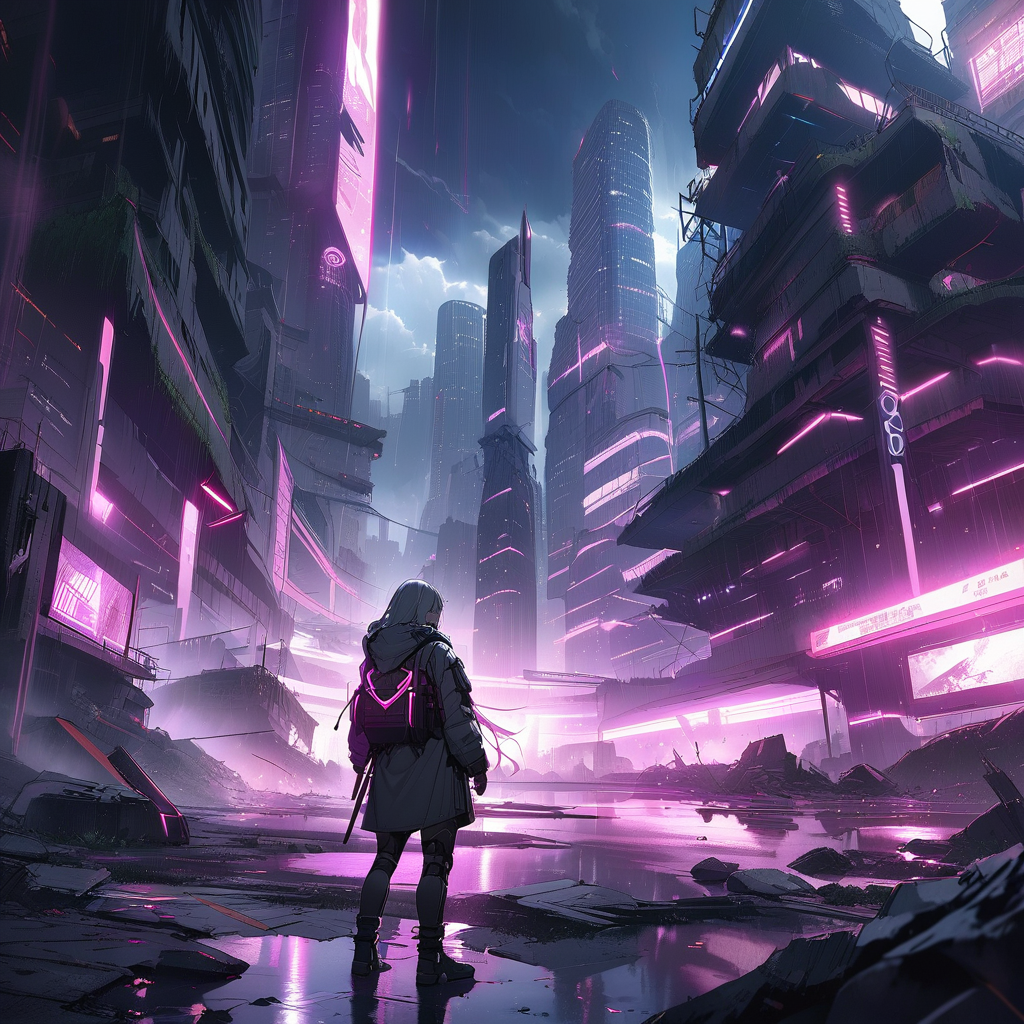

In [13]:
# # 📝 Prompt (입력된 프롬프트)
# prompt = """((masterpiece)), ((best quality)), highly detailed, anime-style, 
#             cinematic lighting, epic battle scene, action-packed, intense fight, 
#             dynamic pose, (multiple characters:1.2), (warzone:1.3), ruined city, debris, 
#             smoke, neon lights, sparks, futuristic battlefield, sci-fi weapons, 
#             energy swords, cyber armor, glowing eyes, dramatic shading, stormy sky, 
#             blood splatter, tension, survival"""

# # ❌ Negative Prompt (배제할 요소)
# negative_prompt = """(worst quality, low quality:1.2), blurry, poorly drawn, extra limbs, 
#                      mutated hands, lowres, bad anatomy, bad composition, pixelated, 
#                      watermark, text"""

# 이미지 생성 설정
image = pipe(
    prompt, 
    negative_prompt=negative_prompt,  # Negative Prompt 적용
    num_inference_steps=30,  # Steps 설정
    guidance_scale=8.0,  # CFG Scale 설정
    # clip_skip=2  # Clip Skip 설정 (현재 diffusers에 직접 지원 X)
).images[0]

# 이미지 저장 및 출력
image.save("generated_sci_fi_battle.png")
image.show()
